In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Lab Session Data.xlsx to Lab Session Data.xlsx


In [ ]:
#1

import pandas as pd
import numpy as np

df = pd.read_excel('Lab Session Data.xlsx', sheet_name="Purchase data")

print(df.head())

X = df.iloc[:11, 2:5].values
y = df.iloc[:11, 2:5].values

y = np.array(y).astype(str)

def compute_intraclass_interclass_distances(X, y):
    unique_classes = np.unique(y)
    centroids = {}
    spreads = {}

    for cls in unique_classes:
        mask = (y == cls)
        class_vectors = X[mask]

        if class_vectors.shape[0] > 0:
            centroids[cls] = np.mean(class_vectors, axis=0)
            spreads[cls] = np.std(class_vectors, axis=0)
        else:
            centroids[cls] = np.nan
            spreads[cls] = np.nan

    interclass_distances = {}
    class_list = list(unique_classes)

    if len(class_list) >= 2:
        for i in range(len(class_list)):
            for j in range(i + 1, len(class_list)):
                cls1, cls2 = class_list[i], class_list[j]
                interclass_distances[(cls1, cls2)] = np.linalg.norm(centroids[cls1] - centroids[cls2])

    return centroids, spreads, interclass_distances

centroids, spreads, interclass_distances = compute_intraclass_interclass_distances(X, y)

print("Centroids:", centroids)
print("Spreads:", spreads)
print("Interclass Distances:", interclass_distances)



  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN          NaN          NaN   


  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN          NaN          NaN   


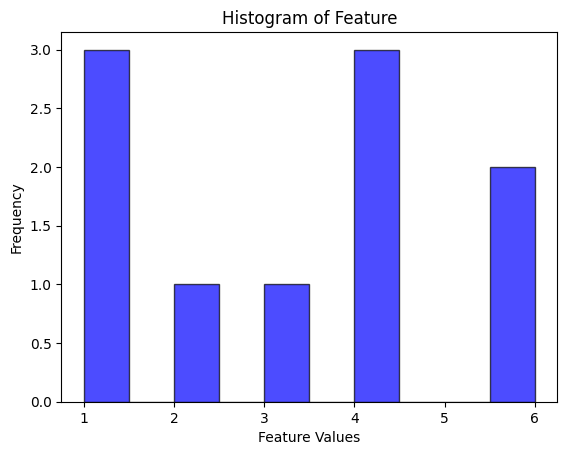

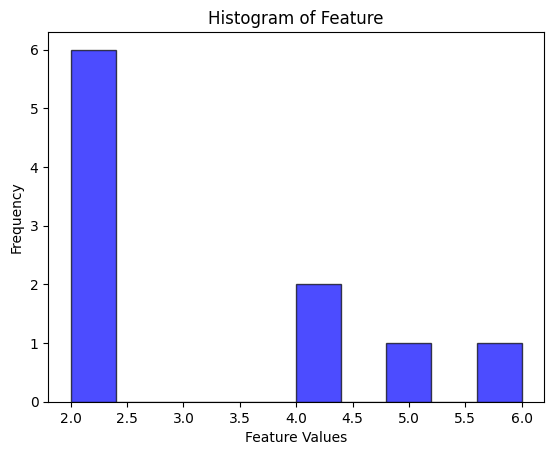

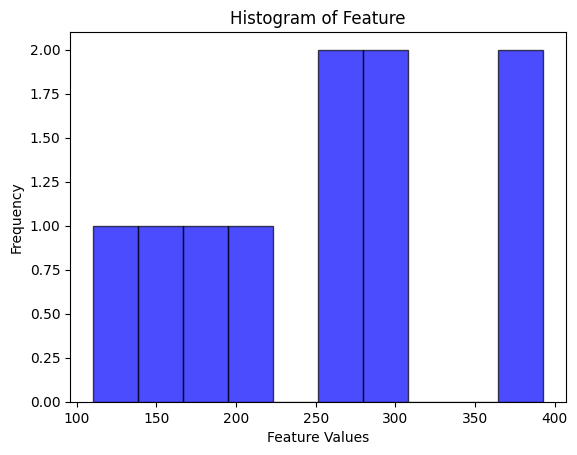

(251.6, 8195.44)

In [ ]:
#2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('Lab Session Data.xlsx', sheet_name="Purchase data")

print(df.head())

X = df.iloc[:11, 2:5].values
y = df.iloc[:11, 2:5].values

def plot_histogram_and_statistics(X, feature_index):
    feature_data = X[:, feature_index]
    plt.hist(feature_data, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title("Histogram of Feature")
    plt.xlabel("Feature Values")
    plt.ylabel("Frequency")
    plt.show()

    mean = np.mean(feature_data)
    variance = np.var(feature_data)
    return mean, variance

plot_histogram_and_statistics(X, 0)
plot_histogram_and_statistics(X, 1)
plot_histogram_and_statistics(X, 2)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN          NaN          NaN   


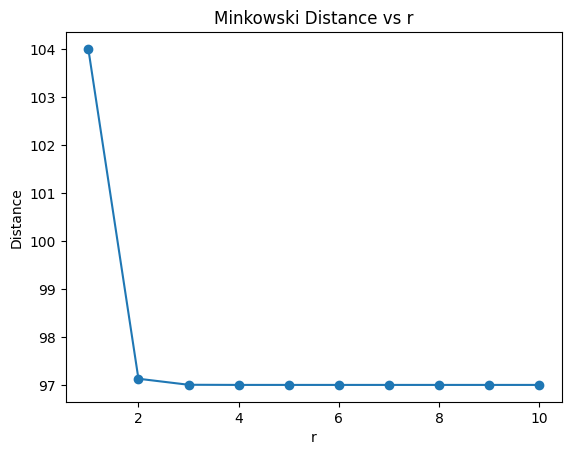

[104.0, 97.12878049270464, 97.00322375653514, 97.00009231113414, 97.00000286232967, 97.00000009364558, 97.00000000318495, 97.00000000011154, 97.00000000000396, 97.00000000000017]


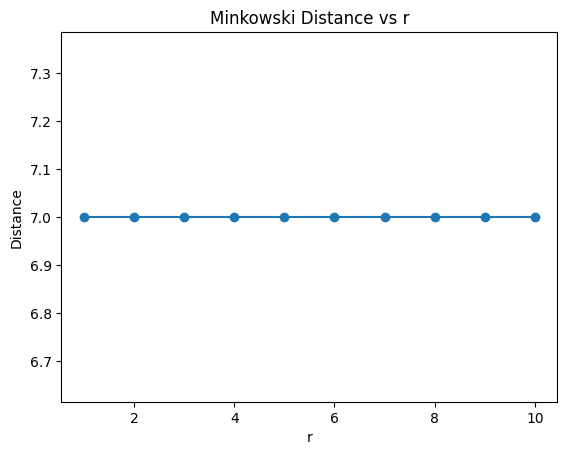

[7.0, 7.0, 6.999999999999999, 7.0, 7.000000000000001, 6.999999999999999, 6.999999999999999, 7.0, 6.999999999999999, 7.000000000000001]


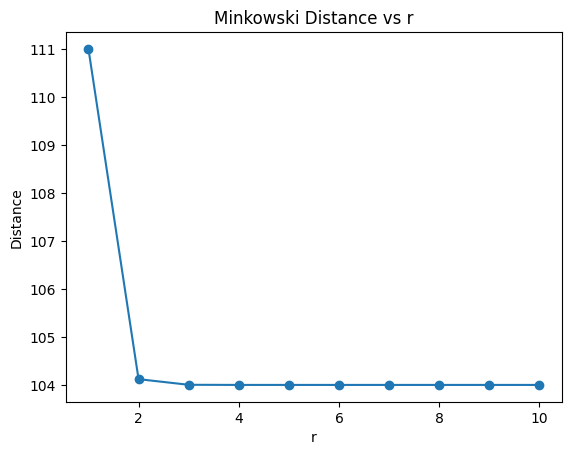

[111.0, 104.12012293500234, 104.00280441155644, 104.0000748978623, 104.00000216607376, 104.00000006609662, 104.00000000209668, 104.00000000006848, 104.00000000000226, 104.0000000000001]


In [ ]:
#3
from scipy.spatial import distance
import pandas as pd
import numpy as np

df = pd.read_excel('Lab Session Data.xlsx', sheet_name="Purchase data")

print(df.head())

X = df.iloc[:11, 2:5].values
y = df.iloc[:11, 2:5].values


def compute_minkowski_distance(X, index1, index2):
    distances = []
    for r in range(1, 11):
        dist = distance.minkowski(X[index1], X[index2], r)
        distances.append(dist)

    plt.plot(range(1, 11), distances, marker='o')
    plt.title("Minkowski Distance vs r")
    plt.xlabel("r")
    plt.ylabel("Distance")
    plt.show()

    return distances

print(compute_minkowski_distance(X, 0, 1))
print(compute_minkowski_distance(X, 0, 2))
print(compute_minkowski_distance(X, 1, 2))


  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN          NaN          NaN   


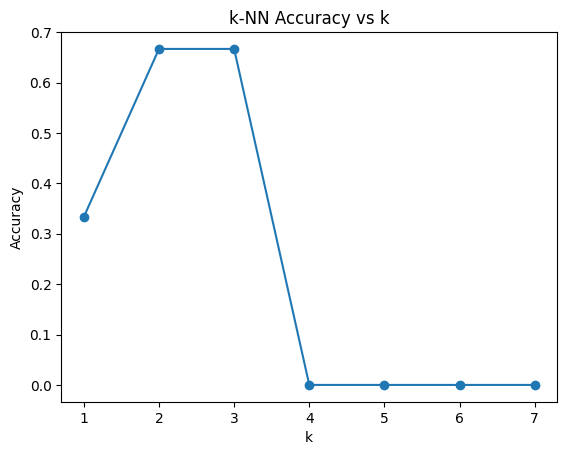

Confusion Matrix - Training Data:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 3 0]
 [0 0 0 2]]

Confusion Matrix - Test Data:
[[2 0 0]
 [0 0 1]
 [0 0 0]]

Classification Report - Training Data:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2

    accuracy                           0.86         7
   macro avg       0.69      0.75      0.71         7
weighted avg       0.75      0.86      0.80         7


Classification Report - Test Data:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.67  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

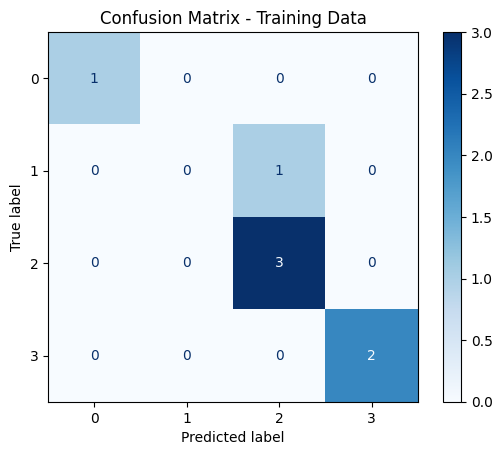

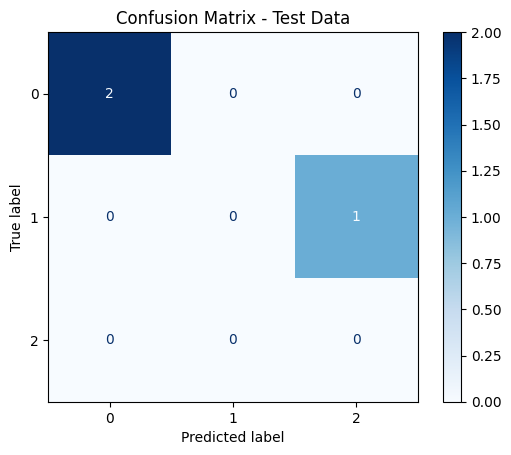

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

df = pd.read_excel('Lab Session Data.xlsx', sheet_name="Purchase data")

print(df.head())

X = df.iloc[:, 2:5].values
y = df.iloc[:, 2].values

y = np.ravel(y)

imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.reshape(-1, 1)).ravel()


#4
def split_data(X, y, test_size=0.3):
    return train_test_split(X, y, test_size=test_size, random_state=42)


X_train, X_test, y_train, y_test = split_data(X, y)

#5
def train_knn(X_train, y_train, k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

knn_model = train_knn(X_train, y_train)

#6
def test_knn(knn, X_test, y_test):
    return knn.score(X_test, y_test)

accuracy = test_knn(knn_model, X_test, y_test)
print("Test Accuracy:", accuracy)

#7
def predict_knn(knn, X_new):
    return knn.predict(X_new)


if X_test.shape[0] > 0:
    predictions = predict_knn(knn_model, X_test)
    print("Predictions:", predictions)

#8
def evaluate_knn_different_k(X_train, X_test, y_train, y_test):
    k_values = list(range(1, min(12, len(X_train)+1)))
    accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        accuracies.append(knn.score(X_test, y_test))

    plt.plot(k_values, accuracies, marker='o')
    plt.title("k-NN Accuracy vs k")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.show()

    return k_values, accuracies

evaluate_knn_different_k(X_train, X_test, y_train, y_test)

#9
def evaluate_model(knn, X_train, y_train, X_test, y_test):
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    print("Confusion Matrix - Training Data:")
    print(confusion_matrix(y_train, y_train_pred))

    print("\nConfusion Matrix - Test Data:")
    print(confusion_matrix(y_test, y_test_pred))

    print("\nClassification Report - Training Data:")
    print(classification_report(y_train, y_train_pred))

    print("\nClassification Report - Test Data:")
    print(classification_report(y_test, y_test_pred))

evaluate_model(knn_model, X_train, y_train, X_test, y_test)

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

plot_confusion_matrix(y_train, y_train_pred, title="Confusion Matrix - Training Data")

plot_confusion_matrix(y_test, y_test_pred, title="Confusion Matrix - Test Data")